# 西安温度最小二乘法

这题直接用法方程法的话，会比较好算，但是如果数据量大的话好像直接求解误差比较大  
如果要求比较精确的解的话，似乎需要**QR)(正交化方法**？我这里要不要用呢？  
也可以直接调用函数库就是：我**先用传统的求法**算一下，然后**和库函数匹配**一下，**不一致**的话再用**QR**  
**结果还挺好的，那就不写QR了** 
### What still need to do:
- 优化输出ui 用占位符表示


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.linalg import solve

### part1 导入数据部分，首先用excel进行了简单的分列，便于后续数据的利用
**IN THIS PART**  
- 首先要计算每日的平均气温
- 然后最小二乘拟合出每个月的均气温曲线
       这一部分需要注意一下到底是用法方程法直接做还是用QR
- 接着通过连续函数求平均算出每个月的平均气温并绘图

In [4]:
# 读取文件，计算每日的平均气温
io = r'temperature.xlsx' #注意将表格方在同个文件夹中，不然要写绝对地址
d = pd.read_excel(io,sheet_name='Sheet1',usecols=[1,2],converters={'max':float, 'min':float}) #读取文件
# 求出7，8，9月每天的平均温度，用于后续的曲线最小二乘拟合改写
Average = np.zeros([3,31])
for i in range(30):
    Average[0][i] = (d['max'][i] + d['min'][i])/2
    Average[1][i] = (d['max'][i+31] + d['min'][i+31])/2
    Average[2][i] = (d['max'][i+61] + d['min'][i+61])/2
Average[0][30] = (d['max'][30] + d['min'][30])/2
Average[2][30] = (d['max'][91] + d['min'][91])/2

Average

array([[28. , 28. , 27. , 28. , 27.5, 27.5, 27.5, 21. , 23.5, 24.5, 26. ,
        25. , 28.5, 30. , 30.5, 25. , 23. , 23.5, 25.5, 27.5, 30. , 23.5,
        28. , 29. , 30. , 31. , 31.5, 33. , 27.5, 27.5, 29.5],
       [30.5, 29. , 25. , 28. , 27. , 23.5, 26. , 27.5, 23.5, 27. , 28. ,
        27. , 29. , 28. , 29.5, 31. , 29. , 29.5, 29.5, 27. , 24.5, 25.5,
        25.5, 27.5, 27.5, 25. , 22.5, 23.5, 25. , 23.5,  0. ],
       [23. , 21.5, 23.5, 24. , 21. , 24.5, 25.5, 25.5, 27.5, 25.5, 21. ,
        23. , 23. , 16.5, 13. , 14.5, 17.5, 16. , 17. , 17. , 18.5, 17. ,
        20. , 19. , 18.5, 20.5, 20.5, 20.5, 21. , 21.5, 23.5]])

### 最小二乘分解函数

In [5]:
# 最小2×拟合函数编写。1次，2次，3次
def myl(x,y,k=1):
# k=1,y = a + bx,g=[1,x] 
    if k == 1: 
        g = np.ones([x.size,2])
        for i in range(x.size):
            g[i,1] = x[i]
# k=2 y=a+bx+cx*x
    elif k == 2:
        g = np.ones([x.size,3])
        for i in range(x.size):
            g[i,1]=x[i]
            g[i,2]=np.square(x[i])
# k=3 y=a+bx+cx*x+dx*xxx
    elif k == 3:
        g = np.ones([x.size,4])
        for i in range(x.size):
            g[i,1]=x[i]
            g[i,2]=np.square(x[i])
            g[i,3]=pow(x[i],3)
# g*g'a=g'y
    G = np.transpose(g)
    y_solve = np.dot(G,y)
    y_solve = np.transpose(y_solve)
    A = np.dot(G,g)
    para = solve(A,y_solve)
#     print(para)
    
    return para 

### 数值积分求均值(这里积分直接手撕表达式就行)

In [6]:
def interfunc(x,para,k):
    if k == 1 :
        ans = para[0]*x + para[1]*x*x*0.5
    elif k == 2:
        ans = para[0]*x + para[1]*x*x*0.5 + para[2]*x*x*x/3
    elif k == 3:
        ans = para[0]*x + para[1]*x*x*0.5 + para[2]*x*x*x/3 + para[3]*x*x*x*x/4
    return ans

### 数值代入

26.392549028082687


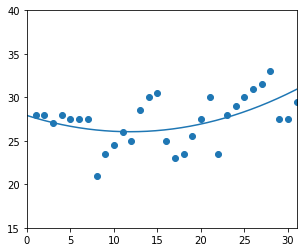

In [8]:
# 将各个月的数据输入进行拟合计算
k = 2
input_x = np.arange(1,32)
para = myl(input_x,Average[0][:],k)

def fucx(x,para,k):
    if k == 1 :
        ans = para[0]+para[1]*x
    elif k == 2:
        ans = para[0]+para[1]*x+para[2]*x*x
    elif k == 3:
        ans = para[0]+para[1]*x+para[2]*x*x+para[3]*x*x*x
    return ans

x_plot = np.linspace(0,31,3000)
y_plot = np.array([fucx(t,para,k) for t in x_plot])

plt.axis('scaled')
plt.xlim((0,31))
plt.ylim((15,40))
plt.scatter(input_x,Average[0][:])
plt.plot(x_plot,y_plot)

Ans = interfunc(31,para,k)-interfunc(1,para,k)
Ans = Ans/31
print(Ans)